In [95]:
#Importing modules
import numpy as np
import pandas as pd
import librosa
import librosa.display
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import History
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

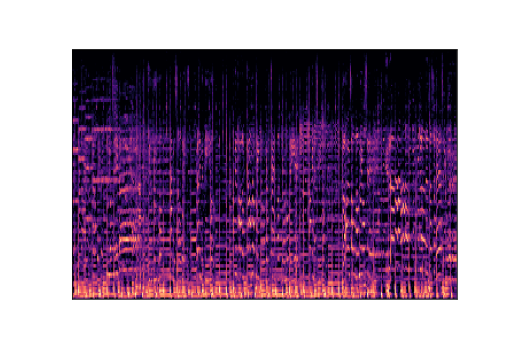

In [96]:
mel_spectogram_2 = mpimg.imread('../Data/images_original/disco/disco00005.png')
plt.imshow(mel_spectogram_2)
plt.axis('off')
plt.show()

In [97]:
def load_data(data_path, test_size=0.1, random_state=42, apply_stft=False):
    data = []
    labels = []
    for class_name in os.listdir(data_path):
        class_path = os.path.join(data_path, class_name)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                if image_name.endswith('.png') or image_name.endswith('.jpg'):  # Handle various image formats
                    image_path = os.path.join(class_path, image_name)
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
                    resized_image = cv2.resize(image, (130, 128))  # Resize image to (130, 128)
                    data.append(resized_image)
                    labels.append(class_name)

    data = np.array(data)
    data = np.expand_dims(data, axis=-1)  # Add channel dimension
    data = data.astype('float32') / 255.0
    labels = np.array(labels)

    # Apply label encoding to labels
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)
    X_train, X_test, y_train, y_test = train_test_split(data, labels_encoded, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test, label_encoder


In [98]:
# Load data and preprocess
dataset_path = '../Data/images_original'
X_train, X_test, y_train, y_test , label_encoder= load_data(dataset_path)

In [99]:
num_classes = 10
print("Number of training samples:", len(X_train))
print("Number of testing samples:", len(X_test))
print(X_train.shape)
input_shape = X_train.shape[1:]
X_test = X_train
y_test = y_train

Number of training samples: 899
Number of testing samples: 100
(899, 128, 130, 1)


In [100]:
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding = "same"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, kernel_size=(3, 3), activation='relu',padding = "same"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu',padding = "same"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, kernel_size=(3, 3), activation='relu',padding = "same"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu',padding = "same"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation = 'relu'),
        Dropout(0.2),
        Dense(32, activation = 'relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [101]:
# Create and compile CNN model
model = create_cnn_model(input_shape, num_classes)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split = 0.2)

Epoch 1/100
12/12 [==============================] - 3s 149ms/step - loss: 2.3107 - accuracy: 0.1001 - val_loss: 2.3030 - val_accuracy: 0.1444
Epoch 2/100
12/12 [==============================] - 2s 132ms/step - loss: 2.3020 - accuracy: 0.0987 - val_loss: 2.3056 - val_accuracy: 0.1056
Epoch 3/100
12/12 [==============================] - 2s 130ms/step - loss: 2.3009 - accuracy: 0.1196 - val_loss: 2.3140 - val_accuracy: 0.0444
Epoch 4/100
12/12 [==============================] - 2s 134ms/step - loss: 2.3007 - accuracy: 0.1168 - val_loss: 2.3110 - val_accuracy: 0.1056
Epoch 5/100
12/12 [==============================] - 2s 129ms/step - loss: 2.2992 - accuracy: 0.1391 - val_loss: 2.3049 - val_accuracy: 0.1278
Epoch 6/100
12/12 [==============================] - 2s 127ms/step - loss: 2.2840 - accuracy: 0.1224 - val_loss: 2.3483 - val_accuracy: 0.0833
Epoch 7/100
12/12 [==============================] - 2s 128ms/step - loss: 2.2631 - accuracy: 0.1502 - val_loss: 2.2429 - val_accuracy: 0.1056

In [102]:
# # Save the model
# model.save("cnn_model.h5")
# print("Model saved successfully.")

In [103]:
# Load the saved model
# loaded_model = load_model("cnn_model.h5")

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


29/29 [==============================] - 1s 20ms/step - loss: 0.6482 - accuracy: 0.8765
Test Loss: 0.6481607556343079
Test Accuracy: 0.8765294551849365


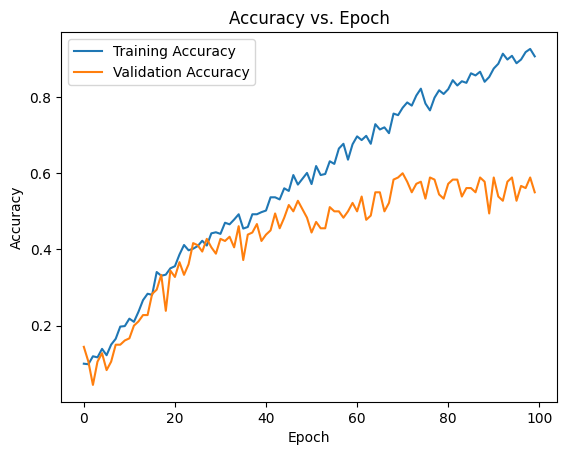

In [104]:
# Plot the accuracy across epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.show()

29/29 [==============================] - 1s 21ms/step
Confusion Matrix:
[[73  0  4  0  2  3  0  0  1  4]
 [ 1 89  0  1  0  2  0  1  0  0]
 [ 1  0 85  2  0  2  0  0  0  5]
 [ 1  1  1 77  3  2  1  0  2  2]
 [ 0  0  0  0 89  1  1  0  1  0]
 [ 0  1  4  1  0 74  0  0  0  2]
 [ 0  0  0  0  0  0 86  0  0  2]
 [ 2  1  1  1  7  0  2 76  0  0]
 [ 3  0  1  4 23  0  0  3 53  0]
 [ 1  0  0  1  0  1  4  0  1 86]]


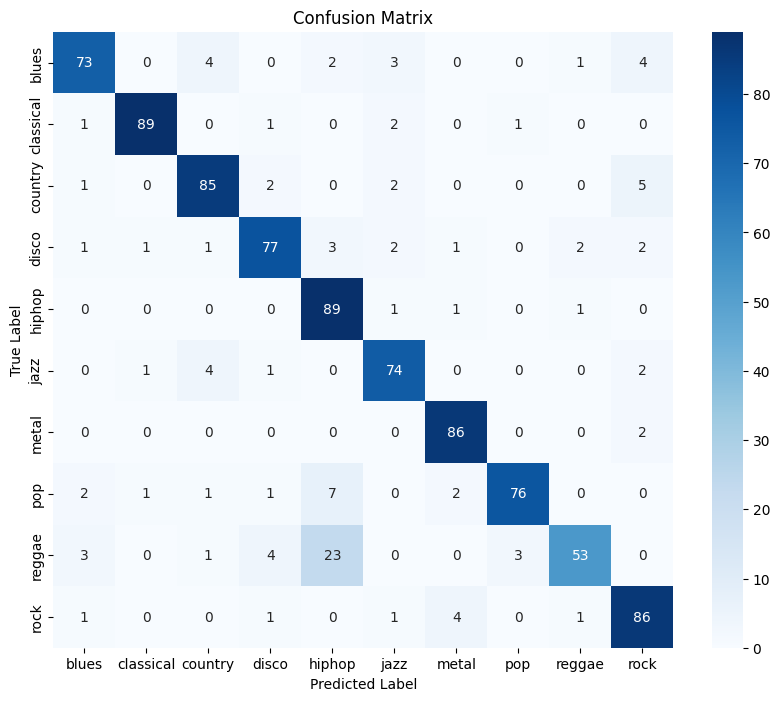

In [105]:
# Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [106]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

       blues       0.89      0.84      0.86        87
   classical       0.97      0.95      0.96        94
     country       0.89      0.89      0.89        95
       disco       0.89      0.86      0.87        90
      hiphop       0.72      0.97      0.82        92
        jazz       0.87      0.90      0.89        82
       metal       0.91      0.98      0.95        88
         pop       0.95      0.84      0.89        90
      reggae       0.91      0.61      0.73        87
        rock       0.85      0.91      0.88        94

    accuracy                           0.88       899
   macro avg       0.88      0.88      0.87       899
weighted avg       0.88      0.88      0.87       899

